In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [11]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

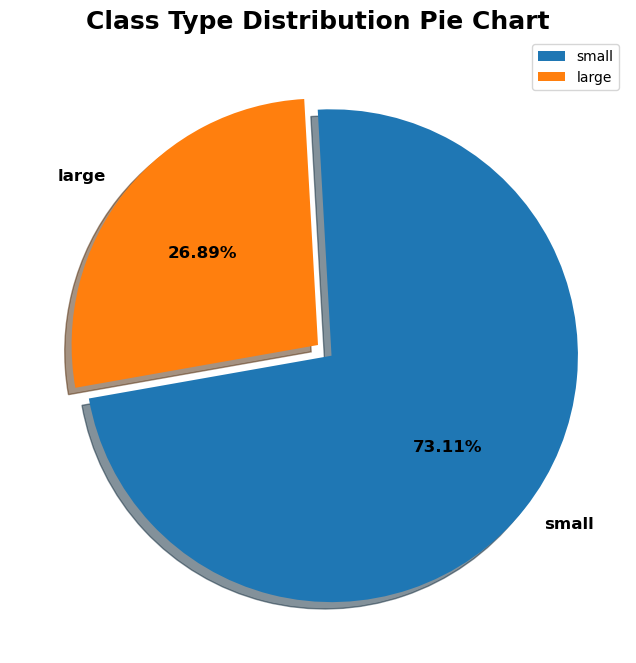

In [12]:
plt.figure(figsize = (12,8))
plt.pie(df['size_category'].value_counts(),
       labels=df.size_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

In [13]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [14]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


Text(0.5, 1.02, 'Num of fires in each month')

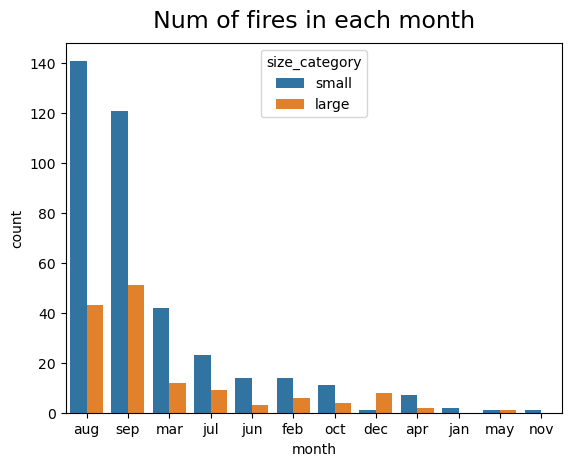

In [15]:
sns.barplot(x='month', y = 'count', hue='size_category', data=month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)

In [16]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


Text(0.5, 1.02, 'Num of fires on each day')

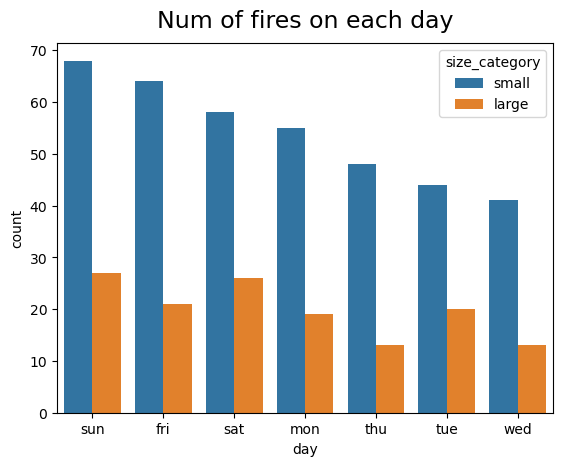

In [17]:
sns.barplot(x='day', y = 'count', hue='size_category', data=day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)

In [18]:
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category'] 

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [19]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


Text(0.5, 1.02, 'Rainfall level in diff category of forest')

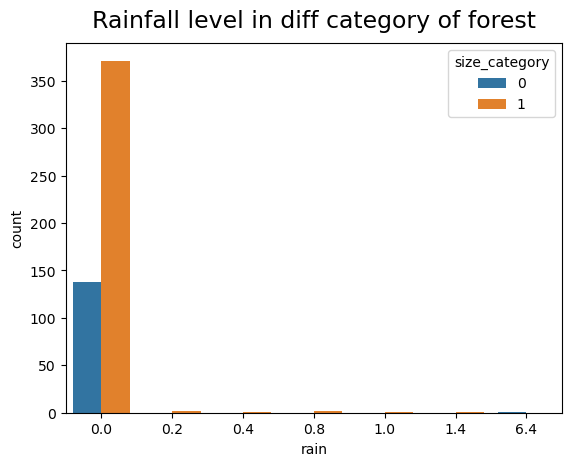

In [20]:
sns.barplot(x='rain', y='count', hue='size_category', data=rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)

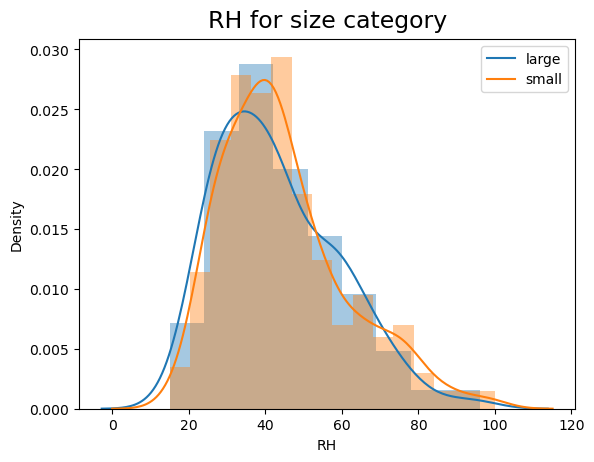

In [21]:
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])                 #orange for small fire, blue for small fire
plt.title("RH for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

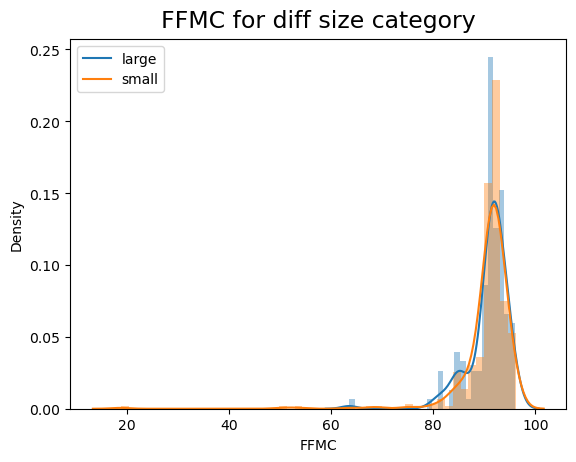

In [22]:
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])                 #orange for small fire, blue for small fire
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

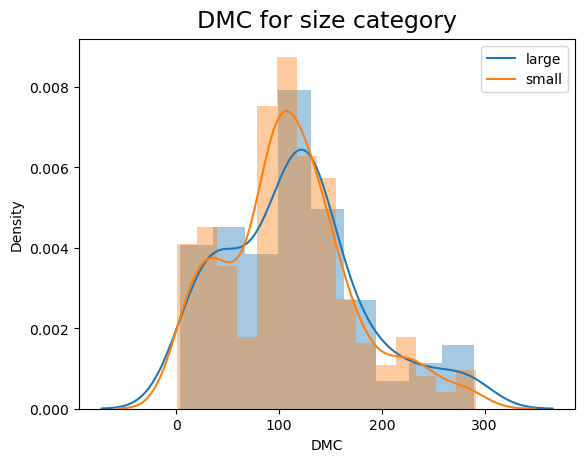

In [23]:
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])                 #orange for small fire, blue for large fire
plt.title("DMC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

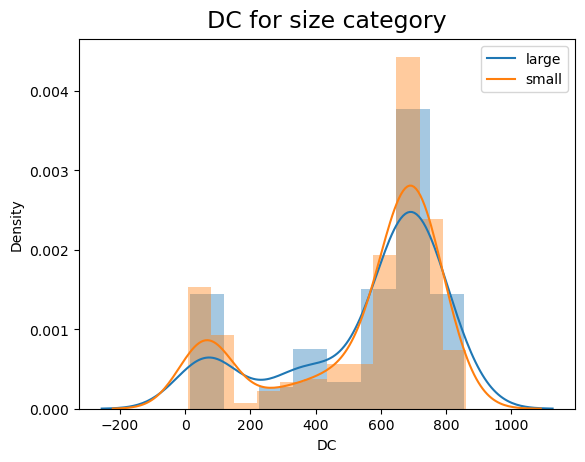

In [24]:
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])                 #orange for small fire, blue for large fire
plt.title("DC for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

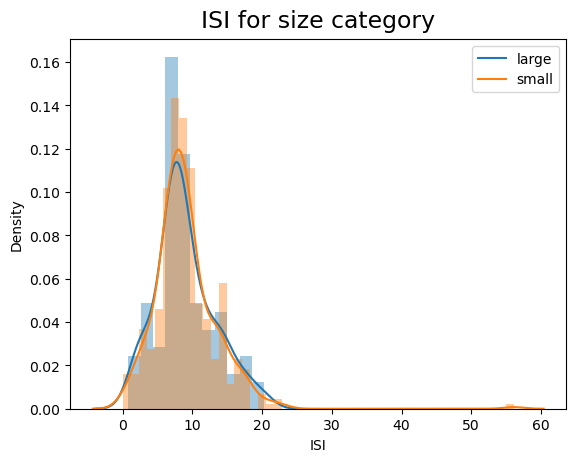

In [25]:
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])                 #orange for small fire, blue for large fire
plt.title("ISI for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

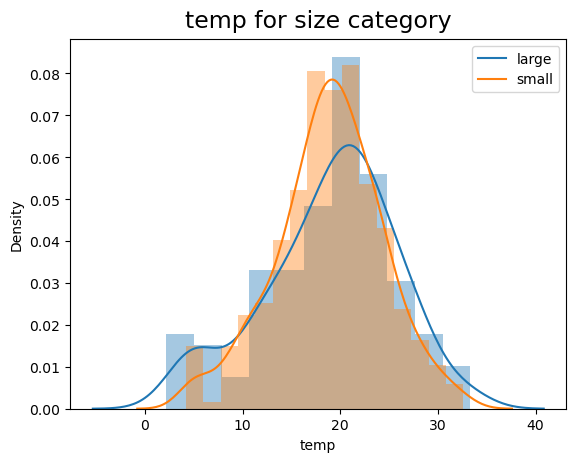

In [26]:
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])                 #orange for small fire, blue for large fire
plt.title("temp for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

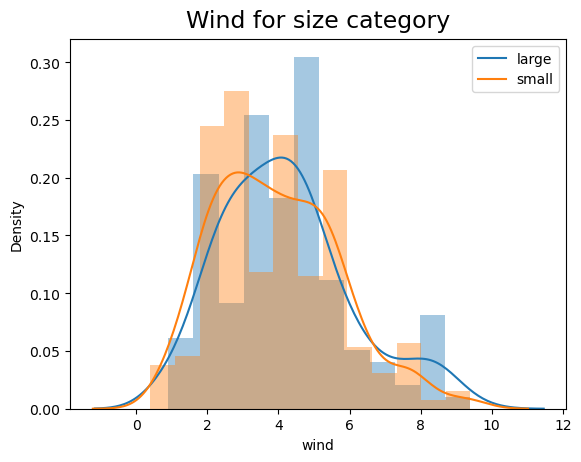

In [27]:
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])                 #orange for small fire, blue for large fire
plt.title("Wind for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

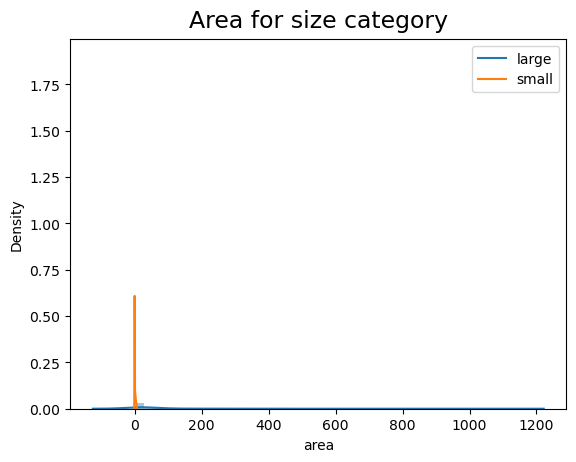

In [28]:
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])                 #orange for small fire, blue for large fire
plt.title("Area for size category", y=1.01, fontsize=17)
legend_drawn_flag = True
plt.legend(["large", "small"], loc=0, frameon=legend_drawn_flag)

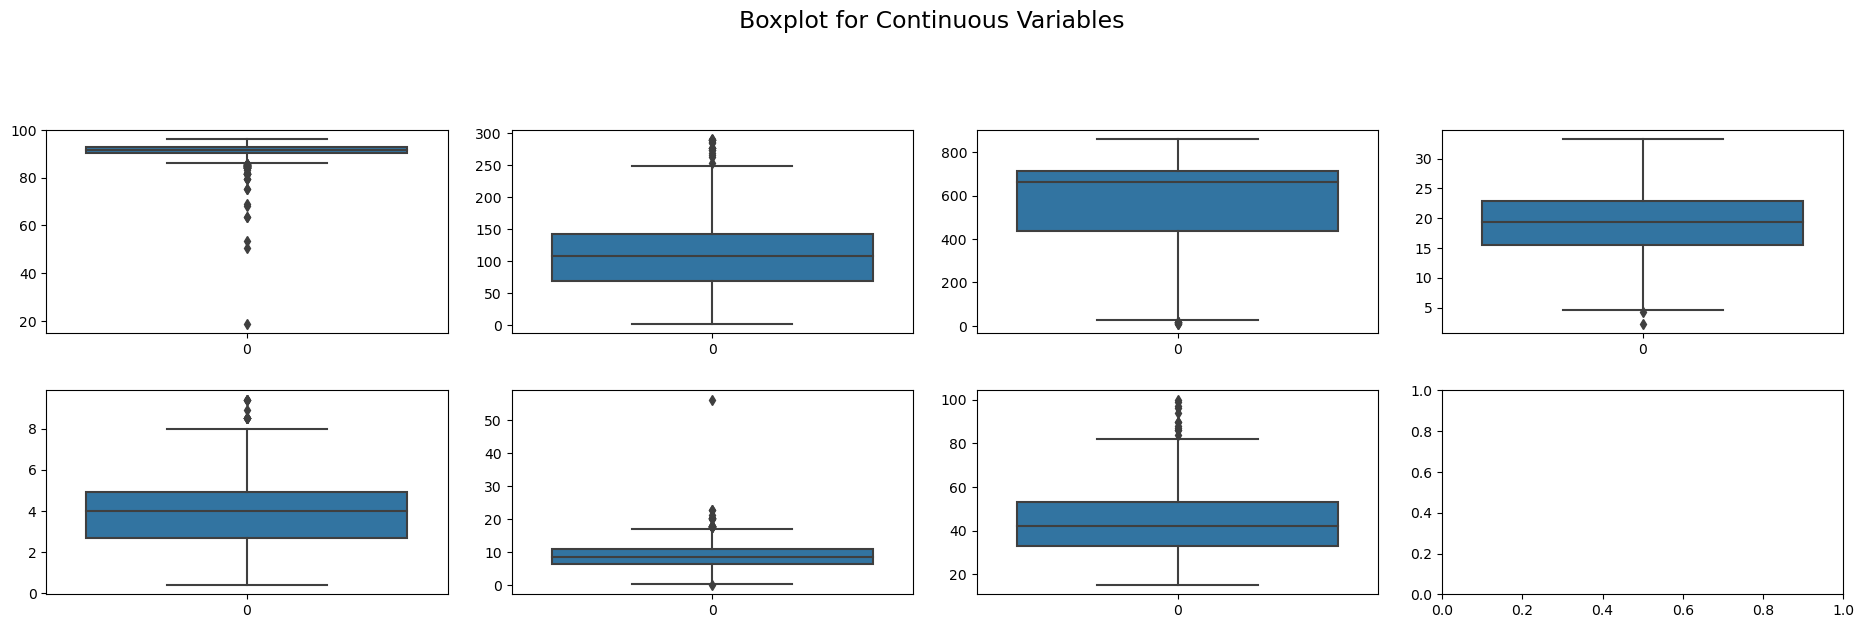

In [29]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

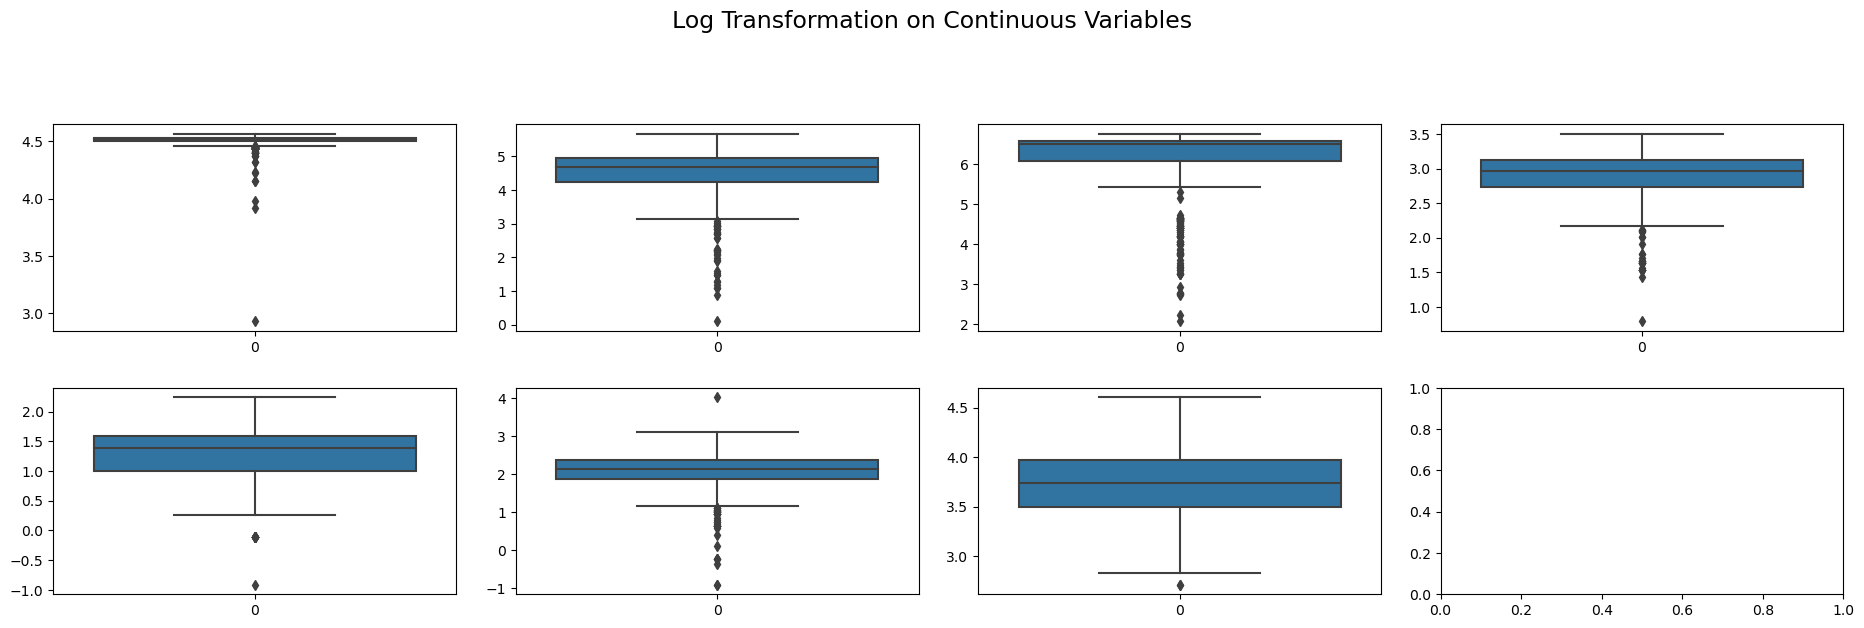

In [30]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(df.FFMC), ax=ax[0,0])
sns.boxplot(np.log(df.DMC), ax=ax[0,1])
sns.boxplot(np.log(df.DC), ax=ax[0,2])
sns.boxplot(np.log(df.temp), ax=ax[0,3])
sns.boxplot(np.log(df.wind), ax=ax[1,0])
sns.boxplot(np.log(df.ISI), ax=ax[1,1])
sns.boxplot(np.log(df.RH), ax=ax[1,2])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

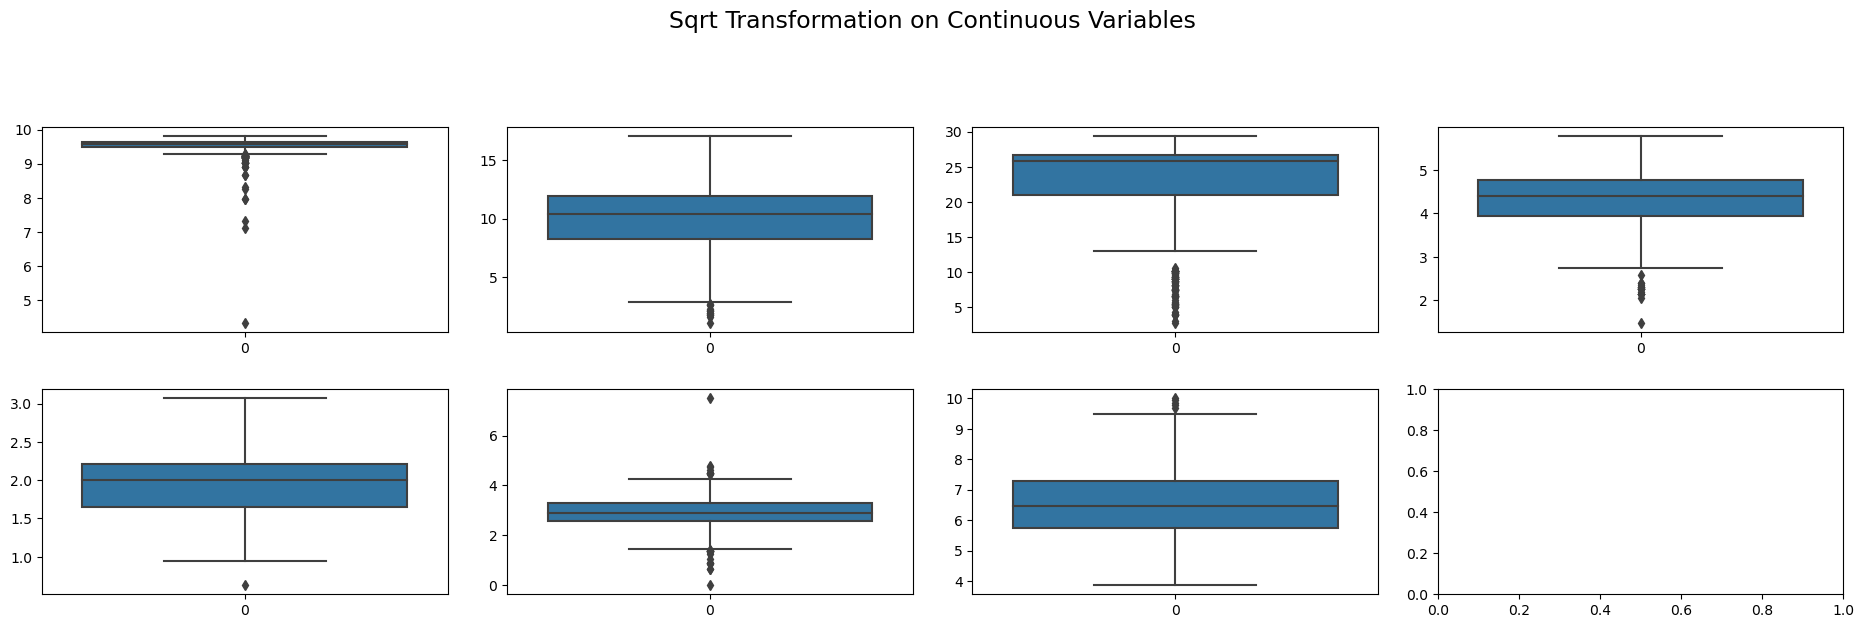

In [31]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.sqrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.sqrt(df.DC), ax=ax[0,2])
sns.boxplot(np.sqrt(df.temp), ax=ax[0,3])
sns.boxplot(np.sqrt(df.wind), ax=ax[1,0])
sns.boxplot(np.sqrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.sqrt(df.RH), ax=ax[1,2])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

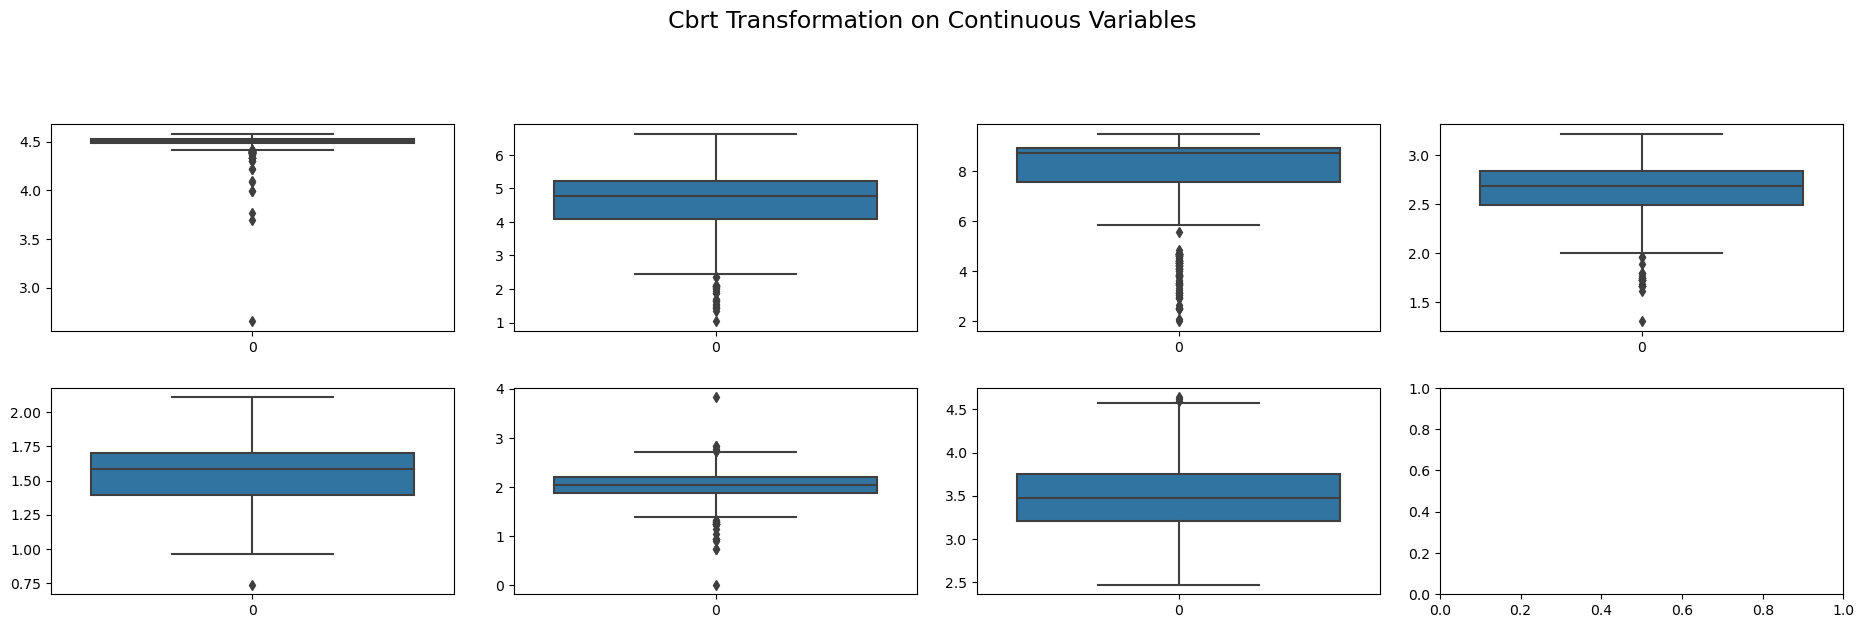

In [32]:
fig, ax=plt.subplots(2,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.FFMC), ax=ax[0,0])
sns.boxplot(np.cbrt(df.DMC), ax=ax[0,1])
sns.boxplot(np.cbrt(df.DC), ax=ax[0,2])
sns.boxplot(np.cbrt(df.temp), ax=ax[0,3])
sns.boxplot(np.cbrt(df.wind), ax=ax[1,0])
sns.boxplot(np.cbrt(df.ISI), ax=ax[1,1])
sns.boxplot(np.cbrt(df.RH), ax=ax[1,2])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

In [33]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [34]:
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [35]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


Text(0.5, 1.01, 'Correlation plot of Target variable with other continuous features')

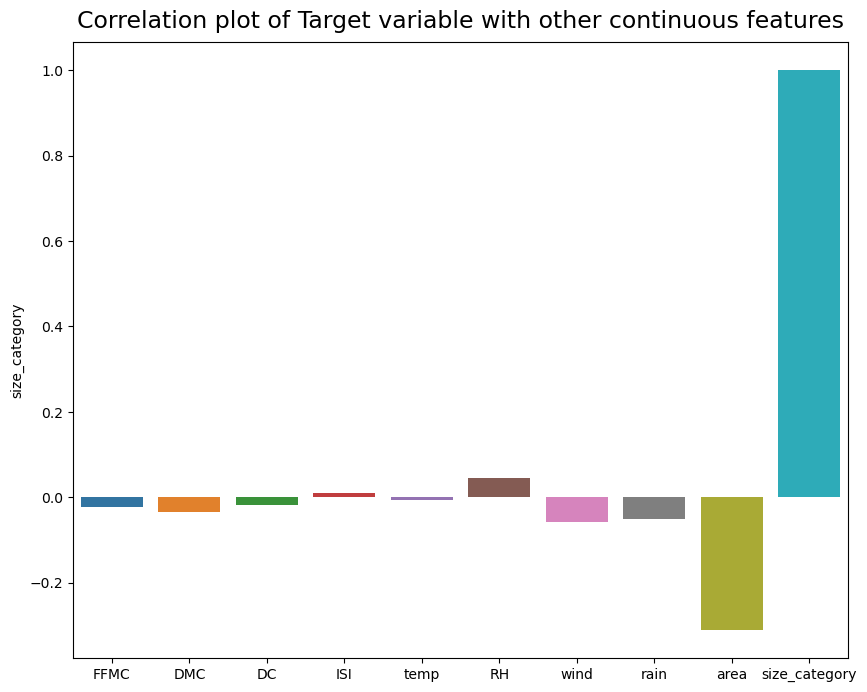

In [36]:
fig , ax=plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)

Text(0.5, 1.0, 'Correlation Map of Numerical variables')

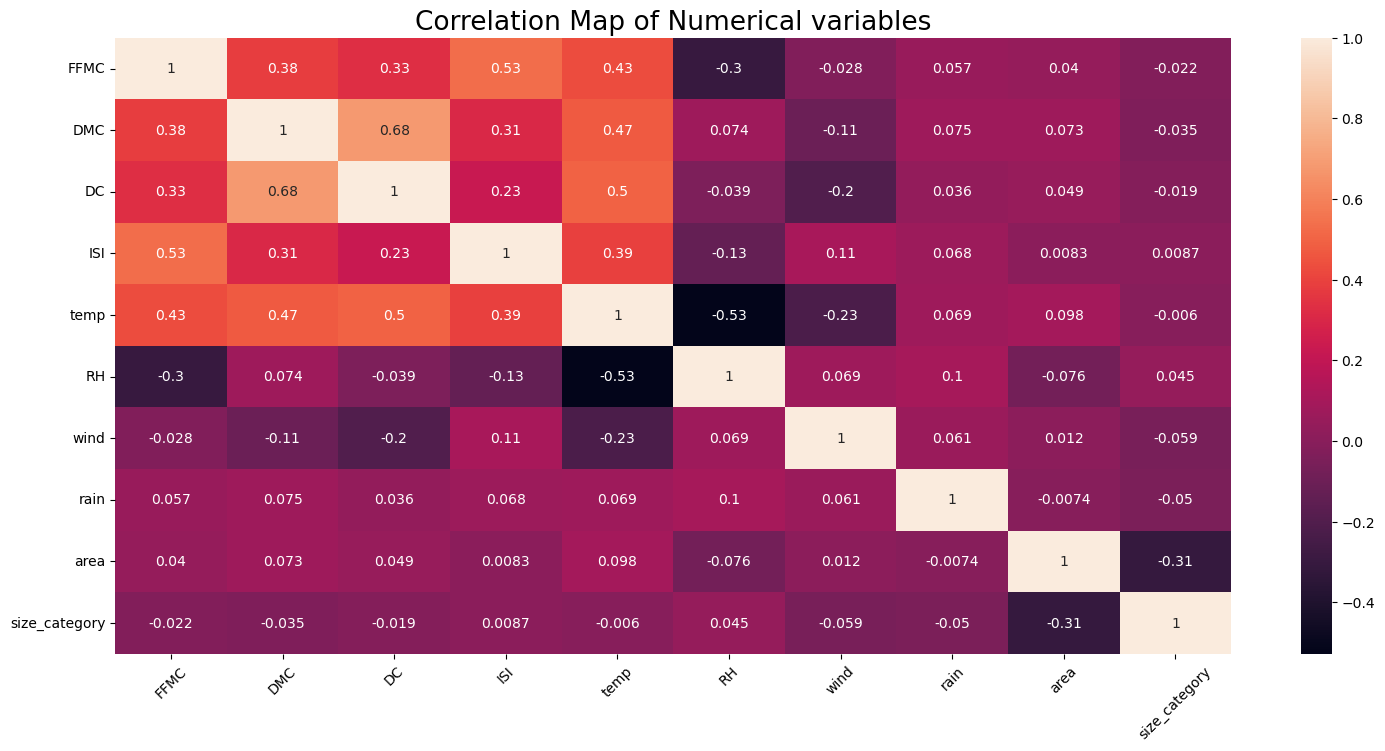

In [37]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19)

Text(0.5, 1.01, 'Pairplot for all numerical variables')

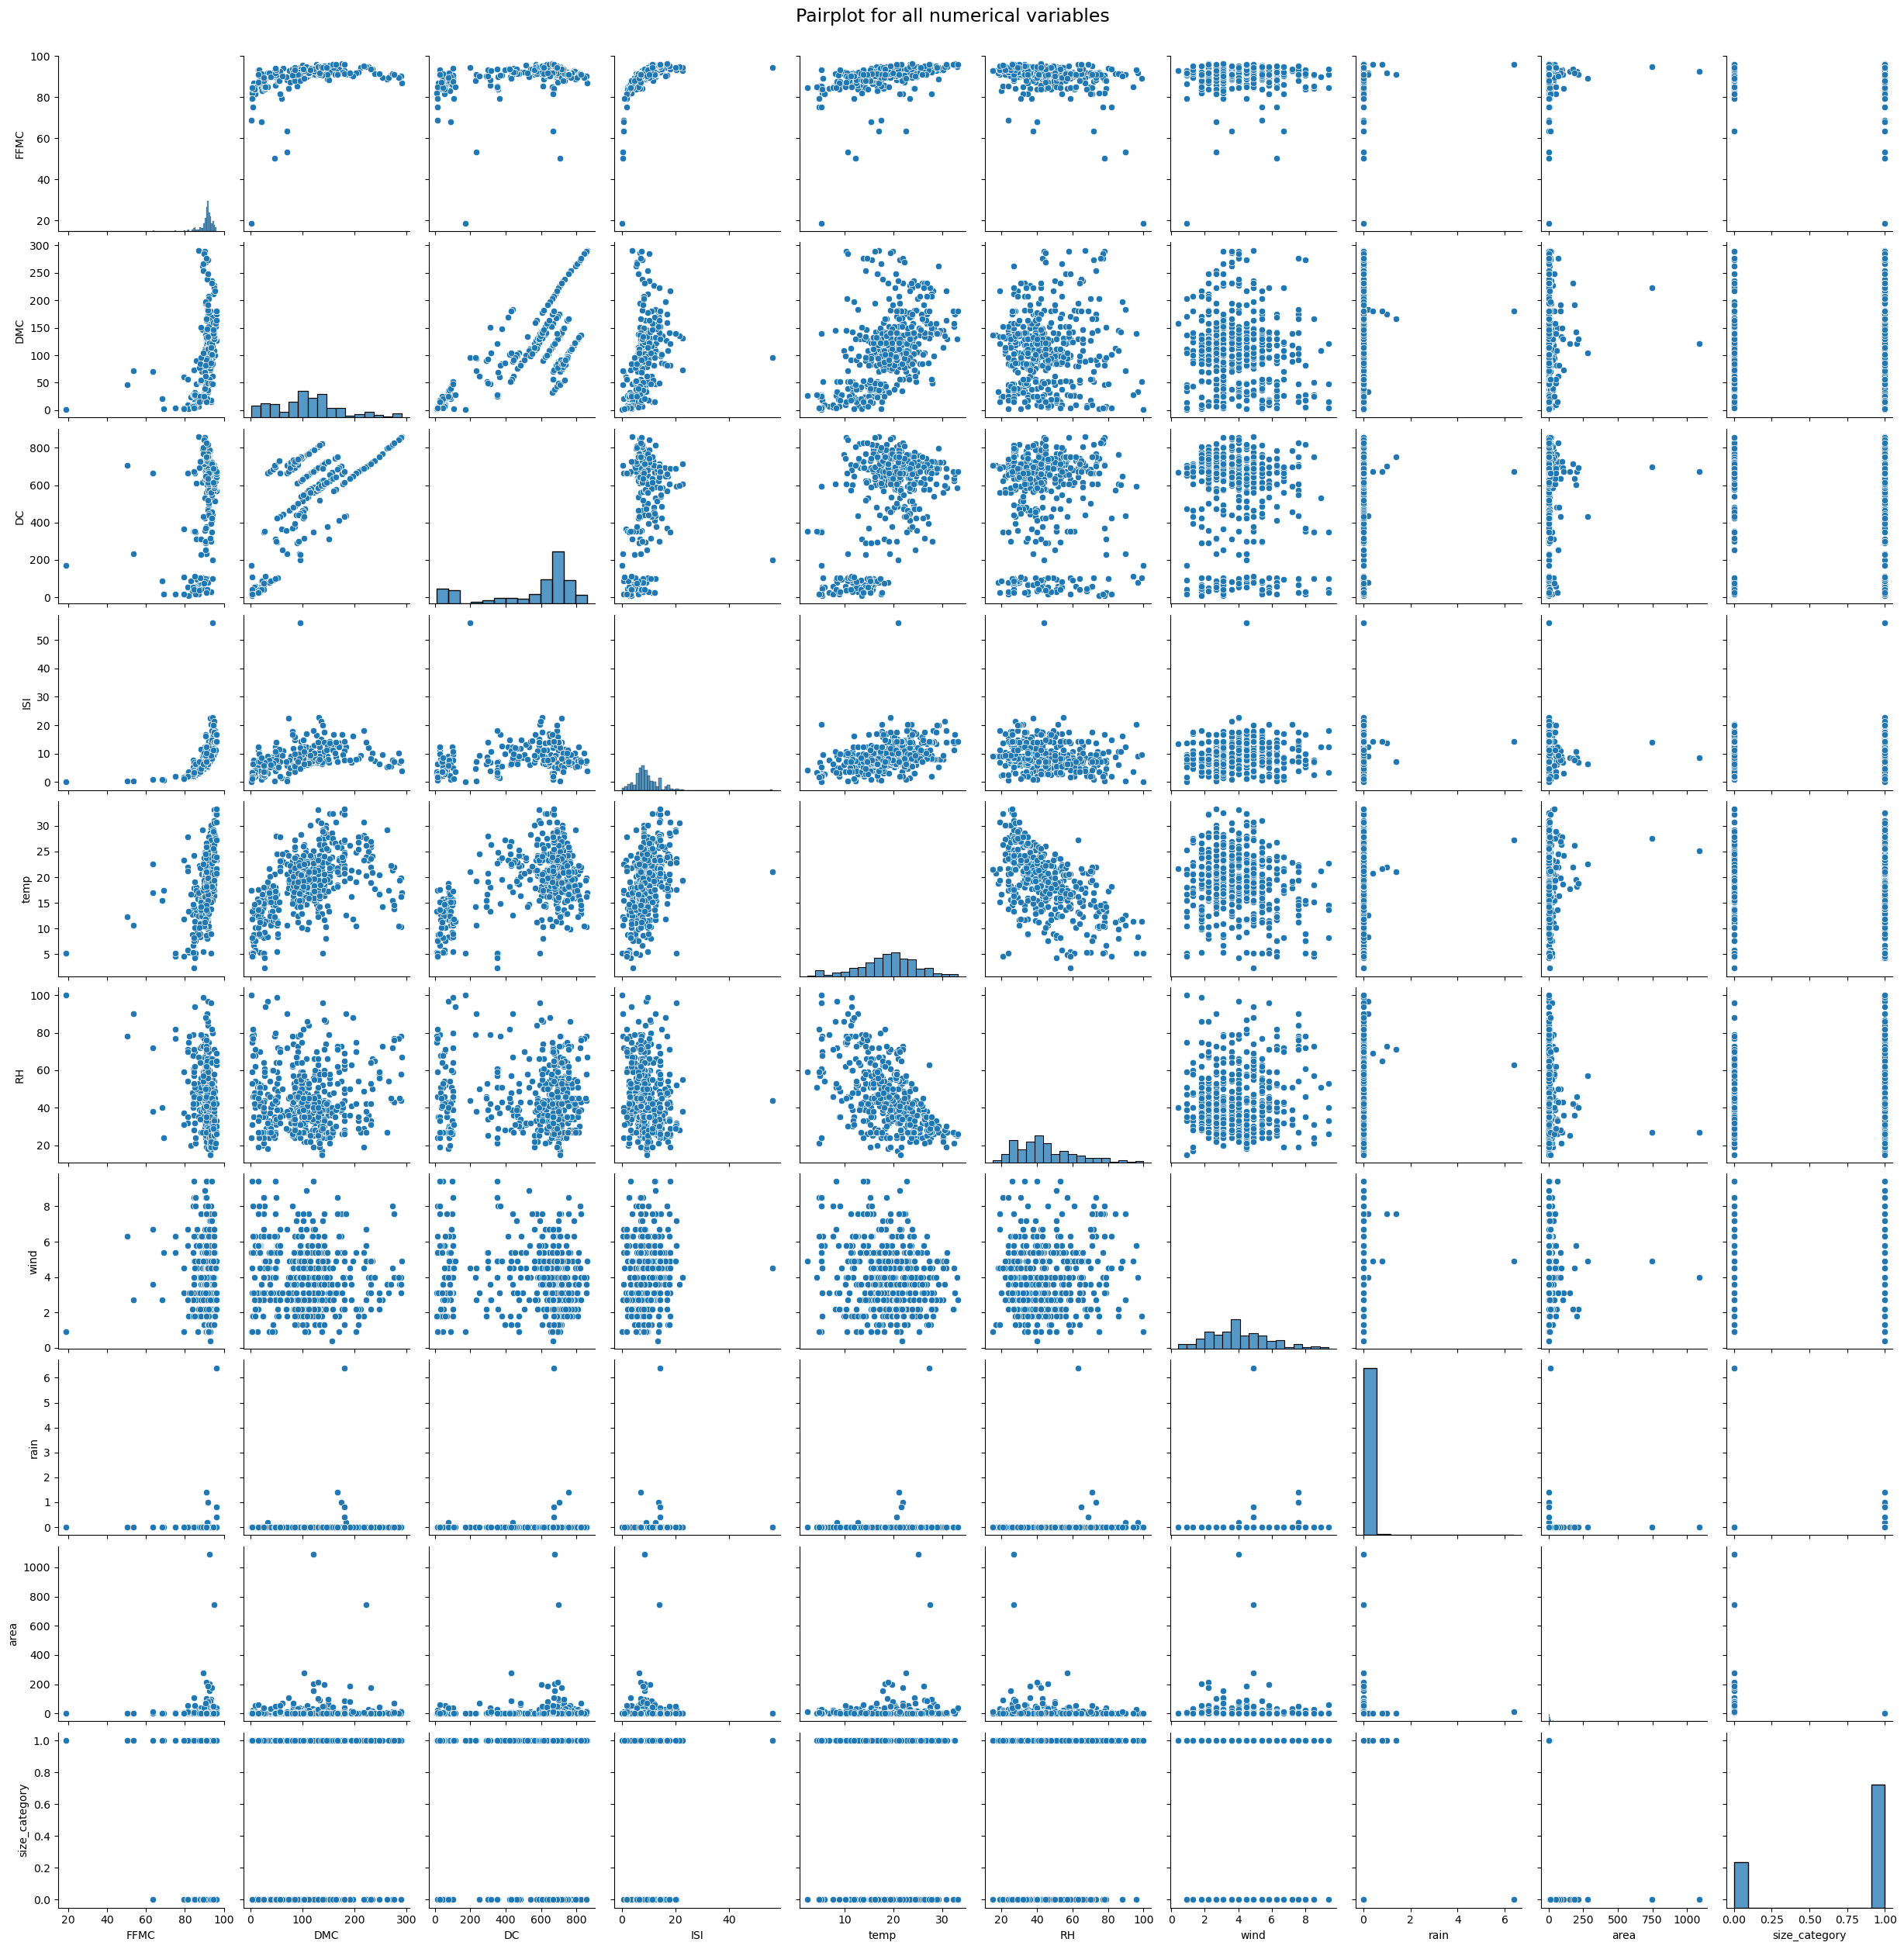

In [38]:
sns.pairplot(df1)
plt.suptitle("Pairplot for all numerical variables", y = 1.01, fontsize=17)

In [39]:
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)

In [40]:
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [41]:
from sklearn.ensemble import IsolationForest
data1=df.copy()

In [42]:
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [43]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [44]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [45]:
df.shape

(517, 27)

In [46]:
x = df.drop('size_category', axis=1)
y = df['size_category']

In [47]:
norm = MinMaxScaler()
std = StandardScaler()

In [48]:
x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)            
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [49]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,-0.443576,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,-0.443576,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,2.254407,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,-0.443576,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,-0.133103,-0.743339,-0.133103,-0.200603,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [51]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((387, 26), (130, 26), (387,), (130,))

In [52]:
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [53]:
from keras.layers import Dropout

In [54]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=26, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [55]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................


[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.808 total time=   5.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................


[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.679 total time=   4.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................


[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.688 total time=   4.2s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................


[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.766 total time=   4.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................


[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.779 total time=   4.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................


[CV 1/5; 2/9] END .....batch_size=10, epochs=50;, score=0.923 total time=  13.6s
[CV 2/5; 2/9] START batch_size=10, epochs=50....................................


[CV 2/5; 2/9] END .....batch_size=10, epochs=50;, score=0.897 total time=  13.4s
[CV 3/5; 2/9] START batch_size=10, epochs=50....................................


[CV 3/5; 2/9] END .....batch_size=10, epochs=50;, score=0.831 total time=   8.3s
[CV 4/5; 2/9] START batch_size=10, epochs=50....................................


[CV 4/5; 2/9] END .....batch_size=10, epochs=50;, score=0.935 total time=   8.6s
[CV 5/5; 2/9] START batch_size=10, epochs=50....................................


[CV 5/5; 2/9] END .....batch_size=10, epochs=50;, score=0.974 total time=   8.6s
[CV 1/5; 3/9] START batch_size=10, epochs=100...................................


[CV 1/5; 3/9] END ....batch_size=10, epochs=100;, score=0.936 total time=  15.1s
[CV 2/5; 3/9] START batch_size=10, epochs=100...................................


[CV 2/5; 3/9] END ....batch_size=10, epochs=100;, score=0.897 total time=  23.8s
[CV 3/5; 3/9] START batch_size=10, epochs=100...................................


[CV 3/5; 3/9] END ....batch_size=10, epochs=100;, score=0.857 total time=  14.2s
[CV 4/5; 3/9] START batch_size=10, epochs=100...................................


[CV 4/5; 3/9] END ....batch_size=10, epochs=100;, score=0.948 total time=  23.7s
[CV 5/5; 3/9] START batch_size=10, epochs=100...................................


[CV 5/5; 3/9] END ....batch_size=10, epochs=100;, score=0.948 total time=  14.1s
[CV 1/5; 4/9] START batch_size=20, epochs=10....................................


[CV 1/5; 4/9] END .....batch_size=20, epochs=10;, score=0.769 total time=   3.9s
[CV 2/5; 4/9] START batch_size=20, epochs=10....................................


[CV 2/5; 4/9] END .....batch_size=20, epochs=10;, score=0.679 total time=   3.9s
[CV 3/5; 4/9] START batch_size=20, epochs=10....................................


[CV 3/5; 4/9] END .....batch_size=20, epochs=10;, score=0.688 total time=   5.1s
[CV 4/5; 4/9] START batch_size=20, epochs=10....................................


[CV 4/5; 4/9] END .....batch_size=20, epochs=10;, score=0.766 total time=   3.8s
[CV 5/5; 4/9] START batch_size=20, epochs=10....................................


[CV 5/5; 4/9] END .....batch_size=20, epochs=10;, score=0.779 total time=   3.8s
[CV 1/5; 5/9] START batch_size=20, epochs=50....................................


[CV 1/5; 5/9] END .....batch_size=20, epochs=50;, score=0.846 total time=   6.5s
[CV 2/5; 5/9] START batch_size=20, epochs=50....................................


[CV 2/5; 5/9] END .....batch_size=20, epochs=50;, score=0.885 total time=   6.5s
[CV 3/5; 5/9] START batch_size=20, epochs=50....................................


[CV 3/5; 5/9] END .....batch_size=20, epochs=50;, score=0.740 total time=   6.5s
[CV 4/5; 5/9] START batch_size=20, epochs=50....................................


[CV 4/5; 5/9] END .....batch_size=20, epochs=50;, score=0.896 total time=   6.5s
[CV 5/5; 5/9] START batch_size=20, epochs=50....................................


[CV 5/5; 5/9] END .....batch_size=20, epochs=50;, score=0.935 total time=   6.8s
[CV 1/5; 6/9] START batch_size=20, epochs=100...................................


[CV 1/5; 6/9] END ....batch_size=20, epochs=100;, score=0.910 total time=   9.8s
[CV 2/5; 6/9] START batch_size=20, epochs=100...................................


[CV 2/5; 6/9] END ....batch_size=20, epochs=100;, score=0.910 total time=   9.8s
[CV 3/5; 6/9] START batch_size=20, epochs=100...................................


[CV 3/5; 6/9] END ....batch_size=20, epochs=100;, score=0.883 total time=  10.0s
[CV 4/5; 6/9] START batch_size=20, epochs=100...................................


[CV 4/5; 6/9] END ....batch_size=20, epochs=100;, score=0.935 total time=   9.9s
[CV 5/5; 6/9] START batch_size=20, epochs=100...................................


[CV 5/5; 6/9] END ....batch_size=20, epochs=100;, score=0.948 total time=   9.8s
[CV 1/5; 7/9] START batch_size=40, epochs=10....................................


[CV 1/5; 7/9] END .....batch_size=40, epochs=10;, score=0.769 total time=   3.6s
[CV 2/5; 7/9] START batch_size=40, epochs=10....................................


[CV 2/5; 7/9] END .....batch_size=40, epochs=10;, score=0.679 total time=   3.7s
[CV 3/5; 7/9] START batch_size=40, epochs=10....................................


[CV 3/5; 7/9] END .....batch_size=40, epochs=10;, score=0.688 total time=   3.7s
[CV 4/5; 7/9] START batch_size=40, epochs=10....................................


[CV 4/5; 7/9] END .....batch_size=40, epochs=10;, score=0.766 total time=   3.6s
[CV 5/5; 7/9] START batch_size=40, epochs=10....................................


[CV 5/5; 7/9] END .....batch_size=40, epochs=10;, score=0.779 total time=   3.7s
[CV 1/5; 8/9] START batch_size=40, epochs=50....................................


[CV 1/5; 8/9] END .....batch_size=40, epochs=50;, score=0.795 total time=   5.2s
[CV 2/5; 8/9] START batch_size=40, epochs=50....................................


[CV 2/5; 8/9] END .....batch_size=40, epochs=50;, score=0.795 total time=   5.9s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................


[CV 3/5; 8/9] END .....batch_size=40, epochs=50;, score=0.714 total time=   5.1s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................


[CV 4/5; 8/9] END .....batch_size=40, epochs=50;, score=0.844 total time=   5.1s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................


[CV 5/5; 8/9] END .....batch_size=40, epochs=50;, score=0.896 total time=   5.1s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................


[CV 1/5; 9/9] END ....batch_size=40, epochs=100;, score=0.872 total time=   7.0s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................


[CV 2/5; 9/9] END ....batch_size=40, epochs=100;, score=0.872 total time=   7.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................


[CV 3/5; 9/9] END ....batch_size=40, epochs=100;, score=0.792 total time=   7.2s
[CV 4/5; 9/9] START batch_size=40, epochs=100...................................


[CV 4/5; 9/9] END ....batch_size=40, epochs=100;, score=0.909 total time=   6.9s
[CV 5/5; 9/9] START batch_size=40, epochs=100...................................


[CV 5/5; 9/9] END ....batch_size=40, epochs=100;, score=0.948 total time=   8.8s


In [56]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9173493027687073, using {'batch_size': 20, 'epochs': 100}
0.7441891312599183,0.05109689359792272 with: {'batch_size': 10, 'epochs': 10}
0.9121545076370239,0.047429063470413174 with: {'batch_size': 10, 'epochs': 50}
0.9173160076141358,0.03535728453138505 with: {'batch_size': 10, 'epochs': 100}
0.7364968299865723,0.04325052234556573 with: {'batch_size': 20, 'epochs': 10}
0.8604395627975464,0.06644188904722043 with: {'batch_size': 20, 'epochs': 50}
0.9173493027687073,0.022489866028402524 with: {'batch_size': 20, 'epochs': 100}
0.7364968299865723,0.04325052234556573 with: {'batch_size': 40, 'epochs': 10}
0.8088578224182129,0.060320692249101804 with: {'batch_size': 40, 'epochs': 50}
0.878588080406189,0.05159360895859899 with: {'batch_size': 40, 'epochs': 100}


In [57]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 26,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 8,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.923 total time=  15.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.910 total time=  15.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.870 total time=  14.9s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.948 total time=  23.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.948 total time=  23.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.962 total time=  23.6s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.897 total time=  15.5s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.857 total time=  14.9s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.922 total time=  14.6s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.948 total time=  14.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 1/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.962 total time=  15.4s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 2/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.872 total time=  15.4s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 3/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.857 total time=  24.0s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 4/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.935 total time=  23.3s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


[CV 5/5; 3/9] END dropout_rate=0.0, learning_rate=0.1;, score=0.935 total time=  13.9s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 1/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.910 total time=  15.7s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 2/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.923 total time=  16.1s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 3/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.857 total time=  16.2s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 4/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.935 total time=  16.5s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


[CV 5/5; 4/9] END dropout_rate=0.1, learning_rate=0.001;, score=0.961 total time=  15.5s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 1/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.936 total time=  16.2s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 2/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.897 total time=  16.4s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 3/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.844 total time=  15.5s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 4/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.948 total time=  15.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


[CV 5/5; 5/9] END dropout_rate=0.1, learning_rate=0.01;, score=0.974 total time=  15.5s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 1/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.923 total time=  16.4s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 2/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.949 total time=  16.9s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 3/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.870 total time=  17.4s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 4/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.961 total time=  24.0s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


[CV 5/5; 6/9] END dropout_rate=0.1, learning_rate=0.1;, score=0.961 total time=  15.3s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 1/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.923 total time=  16.1s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 2/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.910 total time=  24.0s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 3/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.844 total time=  15.3s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 4/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.948 total time=  15.2s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


[CV 5/5; 7/9] END dropout_rate=0.2, learning_rate=0.001;, score=0.948 total time=  24.0s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 1/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.923 total time=  15.6s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 2/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.923 total time=  16.2s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 3/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.870 total time=  15.3s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 4/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.948 total time=  17.1s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


[CV 5/5; 8/9] END dropout_rate=0.2, learning_rate=0.01;, score=0.961 total time=  15.8s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 1/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.923 total time=  16.6s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 2/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.910 total time=  16.5s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 3/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.870 total time=  15.6s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 4/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.961 total time=  15.4s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


[CV 5/5; 9/9] END dropout_rate=0.2, learning_rate=0.1;, score=0.987 total time=  15.4s


In [58]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9328005313873291, using {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9199134111404419,0.02886249486253414 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9172494053840637,0.03725318463100014 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9121212005615235,0.04035770117953185 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9173160076141358,0.03443995502861751 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9199134111404419,0.045210351920994526 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9328005313873291,0.03426467311605549 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9147186040878296,0.03818663816199289 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9250749230384827,0.031139348791853115 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.9303030252456665,0.040584744379040576 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [59]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 26,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.821 total time=  17.1s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.679 total time=  16.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.727 total time=  23.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.831 total time=  15.3s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.909 total time=  15.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


[CV 1/5; 2/12] END activation_function=softmax, init=normal;, score=0.821 total time=  16.6s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


[CV 2/5; 2/12] END activation_function=softmax, init=normal;, score=0.808 total time=  17.4s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


[CV 3/5; 2/12] END activation_function=softmax, init=normal;, score=0.727 total time=  16.4s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


[CV 4/5; 2/12] END activation_function=softmax, init=normal;, score=0.844 total time=  15.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


[CV 5/5; 2/12] END activation_function=softmax, init=normal;, score=0.896 total time=  17.8s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 1/5; 3/12] END activation_function=softmax, init=zero;, score=0.821 total time=  16.7s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 2/5; 3/12] END activation_function=softmax, init=zero;, score=0.679 total time=  16.5s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 3/5; 3/12] END activation_function=softmax, init=zero;, score=0.727 total time=  15.8s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 4/5; 3/12] END activation_function=softmax, init=zero;, score=0.818 total time=  15.7s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


[CV 5/5; 3/12] END activation_function=softmax, init=zero;, score=0.896 total time=  23.9s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 1/5; 4/12] END activation_function=relu, init=uniform;, score=0.936 total time=  15.8s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 2/5; 4/12] END activation_function=relu, init=uniform;, score=0.910 total time=  16.1s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 3/5; 4/12] END activation_function=relu, init=uniform;, score=0.857 total time=  15.3s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 4/5; 4/12] END activation_function=relu, init=uniform;, score=0.935 total time=  23.8s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


[CV 5/5; 4/12] END activation_function=relu, init=uniform;, score=0.974 total time=  14.8s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


[CV 1/5; 5/12] END activation_function=relu, init=normal;, score=0.936 total time=  16.1s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


[CV 2/5; 5/12] END activation_function=relu, init=normal;, score=0.923 total time=  16.4s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


[CV 3/5; 5/12] END activation_function=relu, init=normal;, score=0.805 total time=  23.8s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


[CV 4/5; 5/12] END activation_function=relu, init=normal;, score=0.948 total time=  14.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


[CV 5/5; 5/12] END activation_function=relu, init=normal;, score=0.974 total time=  14.9s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


[CV 1/5; 6/12] END activation_function=relu, init=zero;, score=0.769 total time=  16.1s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


[CV 2/5; 6/12] END activation_function=relu, init=zero;, score=0.679 total time=  16.1s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


[CV 3/5; 6/12] END activation_function=relu, init=zero;, score=0.688 total time=  16.8s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


[CV 4/5; 6/12] END activation_function=relu, init=zero;, score=0.766 total time=  15.6s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


[CV 5/5; 6/12] END activation_function=relu, init=zero;, score=0.779 total time=  15.7s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 1/5; 7/12] END activation_function=tanh, init=uniform;, score=0.962 total time=  16.4s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 2/5; 7/12] END activation_function=tanh, init=uniform;, score=0.974 total time=  16.2s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 3/5; 7/12] END activation_function=tanh, init=uniform;, score=0.870 total time=  15.3s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 4/5; 7/12] END activation_function=tanh, init=uniform;, score=1.000 total time=  15.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


[CV 5/5; 7/12] END activation_function=tanh, init=uniform;, score=0.935 total time=  15.4s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


[CV 1/5; 8/12] END activation_function=tanh, init=normal;, score=0.936 total time=  16.3s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


[CV 2/5; 8/12] END activation_function=tanh, init=normal;, score=0.974 total time=  16.8s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................
[CV 3/5; 8/12] END activation_function=tanh, init=normal;, score=0.870 total time=  15.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


[CV 4/5; 8/12] END activation_function=tanh, init=normal;, score=0.987 total time=  17.8s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


[CV 5/5; 8/12] END activation_function=tanh, init=normal;, score=0.948 total time=  15.5s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


[CV 1/5; 9/12] END activation_function=tanh, init=zero;, score=0.769 total time=  24.3s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


[CV 2/5; 9/12] END activation_function=tanh, init=zero;, score=0.679 total time=  17.4s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


[CV 3/5; 9/12] END activation_function=tanh, init=zero;, score=0.688 total time=  15.5s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


[CV 4/5; 9/12] END activation_function=tanh, init=zero;, score=0.766 total time=  15.7s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


[CV 5/5; 9/12] END activation_function=tanh, init=zero;, score=0.779 total time=  23.9s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


[CV 1/5; 10/12] END activation_function=linear, init=uniform;, score=0.949 total time=  16.0s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


[CV 2/5; 10/12] END activation_function=linear, init=uniform;, score=0.974 total time=  16.1s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.870 total time=  15.4s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.987 total time=  15.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.948 total time=  15.6s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.962 total time=  17.1s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.974 total time=  17.2s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.870 total time=  15.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


[CV 4/5; 11/12] END activation_function=linear, init=normal;, score=1.000 total time=  15.7s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


[CV 5/5; 11/12] END activation_function=linear, init=normal;, score=0.948 total time=  17.7s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


[CV 1/5; 12/12] END activation_function=linear, init=zero;, score=0.769 total time=  17.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


[CV 2/5; 12/12] END activation_function=linear, init=zero;, score=0.679 total time=  16.7s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


[CV 3/5; 12/12] END activation_function=linear, init=zero;, score=0.688 total time=  16.0s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


[CV 4/5; 12/12] END activation_function=linear, init=zero;, score=0.766 total time=  16.7s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


[CV 5/5; 12/12] END activation_function=linear, init=zero;, score=0.779 total time=  24.1s


In [60]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))


Best : 0.9508158445358277, using {'activation_function': 'linear', 'init': 'normal'}
0.7935065031051636,0.08111087795426561 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.819147527217865,0.05499411548289947 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7883116960525512,0.07631098349144178 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9224775075912476,0.03850649610809655 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9172494053840637,0.05849840502096756 with: {'activation_function': 'relu', 'init': 'normal'}
0.7364968299865723,0.04325052234556573 with: {'activation_function': 'relu', 'init': 'zero'}
0.9482184410095215,0.044301055981951394 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9430902361869812,0.04075907251044169 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7364968299865723,0.04325052234556573 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9456543445587158,0.04062898259572028 with: {'activat

In [61]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.949 total time=  16.8s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.962 total time=  16.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.870 total time=  23.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.974 total time=  23.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.961 total time=  15.0s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.949 total time=  20.9s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 2/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.962 total time=  17.5s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 3/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.883 total time=  16.7s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 4/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.961 total time=  16.2s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


[CV 5/5; 2/9] END .........neuron1=4, neuron2=4;, score=0.948 total time=  17.0s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 1/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.936 total time=  18.0s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 2/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.974 total time=  16.8s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 3/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.870 total time=  15.8s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 4/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.987 total time=  15.8s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


[CV 5/5; 3/9] END .........neuron1=4, neuron2=8;, score=0.948 total time=  24.1s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 1/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.936 total time=  17.2s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 2/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=  24.1s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 3/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.883 total time=  23.7s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 4/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.974 total time=  15.2s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


[CV 5/5; 4/9] END .........neuron1=8, neuron2=2;, score=0.948 total time=  15.7s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 1/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.949 total time=  16.5s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 2/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.962 total time=  16.8s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 3/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.870 total time=  16.0s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 4/5; 5/9] END .........neuron1=8, neuron2=4;, score=1.000 total time=  17.2s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


[CV 5/5; 5/9] END .........neuron1=8, neuron2=4;, score=0.948 total time=  16.4s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 1/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.936 total time=  24.3s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 2/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.974 total time=  24.4s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 3/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.870 total time=  23.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 4/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.987 total time=  24.0s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


[CV 5/5; 6/9] END .........neuron1=8, neuron2=8;, score=0.948 total time=  17.4s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 1/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.949 total time=  17.2s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 2/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.974 total time=  20.1s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 3/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.883 total time=  18.6s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 4/5; 7/9] END ........neuron1=16, neuron2=2;, score=1.000 total time=  44.2s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


[CV 5/5; 7/9] END ........neuron1=16, neuron2=2;, score=0.948 total time=  27.0s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 1/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.962 total time=  27.2s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 2/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.974 total time=  24.8s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 3/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.870 total time=  24.7s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 4/5; 8/9] END ........neuron1=16, neuron2=4;, score=1.000 total time=  17.3s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


[CV 5/5; 8/9] END ........neuron1=16, neuron2=4;, score=0.948 total time=  16.4s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 1/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.962 total time=  16.3s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 2/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.962 total time=  16.3s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 3/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.870 total time=  16.6s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 4/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.987 total time=  24.1s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


[CV 5/5; 9/9] END ........neuron1=16, neuron2=8;, score=0.948 total time=  16.6s


In [62]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9508491516113281, using {'neuron1': 16, 'neuron2': 2}
0.9430902361869812,0.03734808109083567 with: {'neuron1': 4, 'neuron2': 2}
0.9404928326606751,0.02926380094176183 with: {'neuron1': 4, 'neuron2': 4}
0.9430902361869812,0.04075907251044169 with: {'neuron1': 4, 'neuron2': 8}
0.9430902361869812,0.03349002680304484 with: {'neuron1': 8, 'neuron2': 2}
0.9456876397132874,0.04224885175581171 with: {'neuron1': 8, 'neuron2': 4}
0.9430902361869812,0.04075907251044169 with: {'neuron1': 8, 'neuron2': 8}
0.9508491516113281,0.03890640559815027 with: {'neuron1': 16, 'neuron2': 2}
0.9508158445358277,0.04383194651558927 with: {'neuron1': 16, 'neuron2': 4}
0.9456543326377869,0.03981165201673784 with: {'neuron1': 16, 'neuron2': 8}


In [63]:
from sklearn.metrics import classification_report, accuracy_score

In [64]:
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 26,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Fitting the model

model.fit(x_train,y_train)

# Predicting using trained model

y_predict = model.predict(x_test)


# Printing the metrics

print("Test Accuracy:", accuracy_score(y_test,y_predict))

5/5 [==============================] - 0s 5ms/step
Test Accuracy: 0.9846153846153847


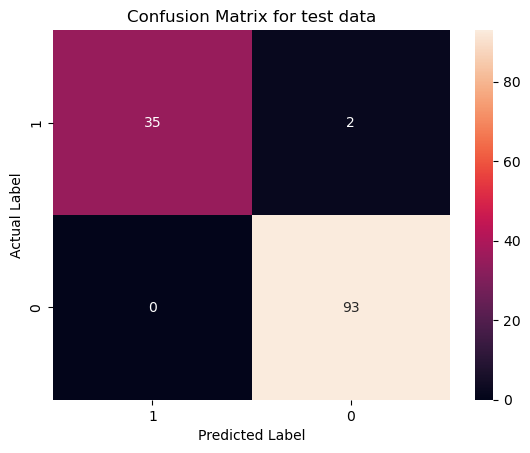

In [65]:
cm_df=confusion_matrix(y_test, y_predict)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

In [66]:
y_hat = model.predict(x_train)
print("Train Accuracy:", accuracy_score(y_train, y_hat))

13/13 [==============================] - 0s 7ms/step
Train Accuracy: 0.9974160206718347


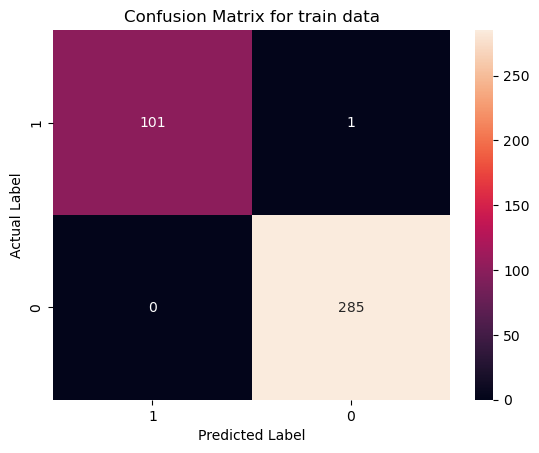

In [67]:
cm_df=confusion_matrix(y_train, y_hat)
class_label = ["1", "0"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# End Assignment